In [200]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression,LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
import matplotlib.pyplot as plt

In [188]:
df=pd.read_csv("oral_and _oropharyngeal_cancer_dataset.csv")
print(df.shape)
data=np.array(df)
#print(data)
x=data[:,:-1]
y=data[:,-1]
print(data.shape,x.shape,y.shape)


(1398, 16)
(1398, 16) (1398, 15) (1398,)


In [189]:
epsilon=0.0000001
for i in range(x.shape[1]):
    min_=min(x[:,i])
    max_=max(x[:,i])
    x[:,i]=(x[:,i]-min_)/(max_-min_+epsilon)
    x[:,i]=(x[:,i]-np.mean(x[:,i]))/(np.std(x[:,i]+epsilon))

In [190]:
print(any(np.mean(x,axis=0)>0.00001))
print(any(np.std(x,axis=0)>1))
#print(np.mean(x,axis=0))
#print(np.std(x,axis=0))

False
False


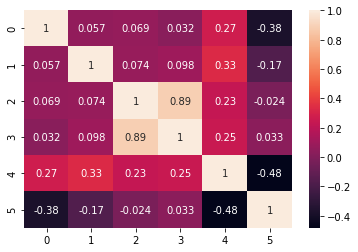

In [191]:
heatmap_df=pd.DataFrame(x[:,:6])
cm=np.corrcoef(heatmap_df.values.T)
sns.heatmap(cm,annot=True)
plt.show()

In [192]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=.30)
print(xtrain.shape,ytrain.shape,xtest.shape,ytest.shape)

(978, 15) (978,) (420, 15) (420,)


In [193]:
'''print(ytrain)
for i in range(xtrain.shape[1]):
    print(x[:,i].dtype)
    if any(xtrain[:,i]==np.nan):
        print("true")
    if any(xtrain[:,i]==np.inf):
        print("true")'''

'print(ytrain)\nfor i in range(xtrain.shape[1]):\n    print(x[:,i].dtype)\n    if any(xtrain[:,i]==np.nan):\n        print("true")\n    if any(xtrain[:,i]==np.inf):\n        print("true")'

In [203]:
lr=LogisticRegression(penalty='l2',solver='lbfgs')
lr.fit(xtrain,ytrain)
pred=lr.predict(xtest)
print("Accuracy Score : %.2f"%accuracy_score(pred,ytest))
print("\nConfusion Matrix \n",confusion_matrix(pred,ytest))
print("\nclassification report \n",classification_report(pred,ytest))

Accuracy Score : 0.82

Confusion Matrix 
 [[326  66]
 [  9  19]]

classification report 
               precision    recall  f1-score   support

         0.0       0.97      0.83      0.90       392
         1.0       0.22      0.68      0.34        28

    accuracy                           0.82       420
   macro avg       0.60      0.76      0.62       420
weighted avg       0.92      0.82      0.86       420



In [204]:
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(xtrain, ytrain)
pred = classifier.predict(xtest)
print("Accuracy Score : %.2f"%accuracy_score(pred,ytest))
print("\nConfusion Matrix \n",confusion_matrix(pred,ytest))
print("\nclassification report \n",classification_report(pred,ytest))

Accuracy Score : 0.92

Confusion Matrix 
 [[328  26]
 [  7  59]]

classification report 
               precision    recall  f1-score   support

         0.0       0.98      0.93      0.95       354
         1.0       0.69      0.89      0.78        66

    accuracy                           0.92       420
   macro avg       0.84      0.91      0.87       420
weighted avg       0.93      0.92      0.93       420



In [211]:
from keras.models import Sequential
from keras.layers import Dense
import keras.backend as k
import tensorflow as tf

In [287]:
lin_reg=Sequential()
lin_reg.add(Dense(1,activation='sigmoid'))

In [288]:
lin_reg.compile(loss='mse',optimizer="sgd",metrics=['accuracy'])

In [289]:
lin_reg.fit(xtrain,ytrain,epochs=20,batch_size=64)

Epoch 1/20
978/978 [==============================] - 0s 207us/step - loss: 0.2749 - acc: 0.5000
Epoch 2/20
978/978 [==============================] - 0s 26us/step - loss: 0.2703 - acc: 0.5164
Epoch 3/20
978/978 [==============================] - 0s 30us/step - loss: 0.2660 - acc: 0.5266
Epoch 4/20
978/978 [==============================] - 0s 26us/step - loss: 0.2617 - acc: 0.5358
Epoch 5/20
978/978 [==============================] - 0s 26us/step - loss: 0.2574 - acc: 0.5481
Epoch 6/20
978/978 [==============================] - 0s 29us/step - loss: 0.2533 - acc: 0.5593
Epoch 7/20
978/978 [==============================] - 0s 25us/step - loss: 0.2493 - acc: 0.5757
Epoch 8/20
978/978 [==============================] - 0s 24us/step - loss: 0.2456 - acc: 0.5869
Epoch 9/20
978/978 [==============================] - 0s 27us/step - loss: 0.2418 - acc: 0.6022
Epoch 10/20
978/978 [==============================] - 0s 23us/step - loss: 0.2382 - acc: 0.6084
Epoch 11/20
978/978 [=================